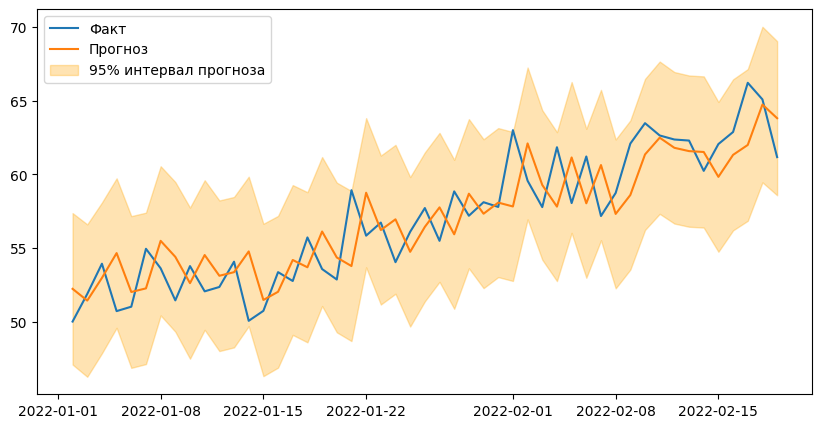

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
 
np.random.seed(42)
dates = pd.date_range(start="2022-01-01", periods=50, freq="D")
sales = 50 + np.arange(50) * 0.3 + np.random.normal(scale=2, size=50)
df = pd.DataFrame({"sales": sales}, index=dates)
 
df["lag_1"] = df["sales"].shift(1)
df = df.dropna()
 
X = sm.add_constant(df["lag_1"])
y = df["sales"]
 
model = sm.OLS(y, X).fit()
 
pred = model.get_prediction(X)
pred_summary = pred.summary_frame(alpha=0.05)  # 95%
 
plt.figure(figsize=(10,5))
plt.plot(df.index, y, label="Факт")
plt.plot(df.index, pred_summary["mean"], label="Прогноз")
plt.fill_between(df.index,
                 pred_summary["obs_ci_lower"],
                 pred_summary["obs_ci_upper"],
                 color="orange", alpha=0.3, label="95% интервал прогноза")
plt.legend()
plt.show()

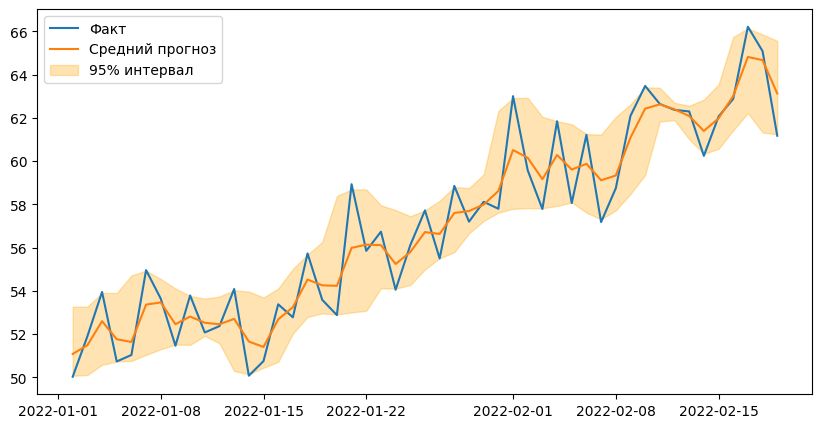

In [ ]:
from sklearn.ensemble import RandomForestRegressor
 
X = np.arange(len(df)).reshape(-1, 1)
y = df["sales"].values
 
n_bootstrap = 100
predictions = []
 
for _ in range(n_bootstrap):
    idx = np.random.choice(len(X), len(X), replace=True)
    X_boot, y_boot = X[idx], y[idx]
    model = RandomForestRegressor(n_estimators=50)
    model.fit(X_boot, y_boot)
    predictions.append(model.predict(X))
 
predictions = np.array(predictions)
lower = np.percentile(predictions, 2.5, axis=0)
upper = np.percentile(predictions, 97.5, axis=0)
mean_pred = np.mean(predictions, axis=0)
 
plt.figure(figsize=(10,5))
plt.plot(df.index, y, label="Факт")
plt.plot(df.index, mean_pred, label="Средний прогноз")
plt.fill_between(df.index, lower, upper, color="orange", alpha=0.3, label="95% интервал")
plt.legend()
plt.show()

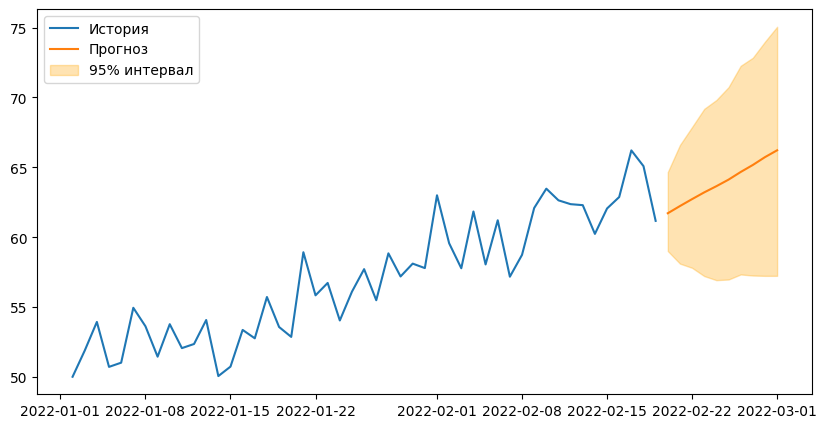

In [14]:
n_simulations = 1000
forecast_steps = 10
last_value = df["sales"].iloc[-1]
forecast_paths = []
 
for _ in range(n_simulations):
    path = [last_value]
    for _ in range(forecast_steps):
        next_value = path[-1] + 0.5 + np.random.normal(scale=1.5)
        path.append(next_value)
    forecast_paths.append(path[1:])
 
forecast_paths = np.array(forecast_paths)
lower = np.percentile(forecast_paths, 2.5, axis=0)
upper = np.percentile(forecast_paths, 97.5, axis=0)
mean_forecast = np.mean(forecast_paths, axis=0)
 
future_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq="D")
 
plt.figure(figsize=(10,5))
plt.plot(df.index, df["sales"], label="История")
plt.plot(future_dates, mean_forecast, label="Прогноз")
plt.fill_between(future_dates, lower, upper, color="orange", alpha=0.3, label="95% интервал")
plt.legend()
plt.show()